In [11]:
import pandas as pd
from torch import exp
import numpy as np
import itertools
import matplotlib.pyplot as plt
# Importing and converting the data
training_data = pd.read_csv('./data3.csv')
training_data_x = training_data['day'].to_numpy()
training_data_y = training_data['head'].to_numpy()
training_data_x_unsorted = training_data_x.copy()
training_data_y_unsorted = training_data_y.copy()

training_data_x.sort()
training_data_y.sort()

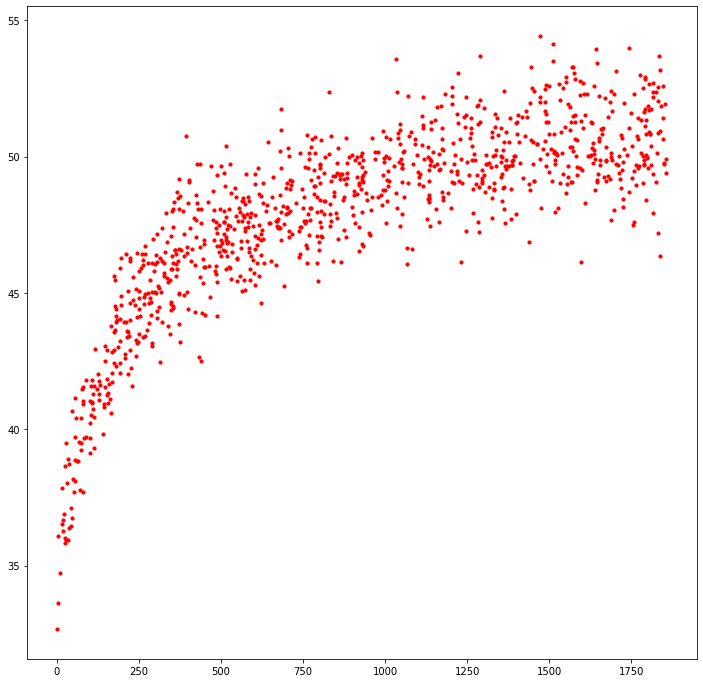

In [12]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 12))
plt.scatter(training_data_x_unsorted,training_data_y_unsorted , c='red', s=10, label='Original data')
plt.show()

In [13]:

import torch
torch.set_default_dtype(torch.float64)
# Training the model
x_train = torch.reshape(torch.tensor(training_data_x), (-1, 1))
y_train = torch.reshape(torch.tensor(training_data_y), (-1, 1))

w1 = torch.rand(1, 1, requires_grad=True)
b1 = torch.rand(1, requires_grad=True)
lr = 0.001
epochs = 6000
stepping = 1000



In [14]:
def sigmoid(z):
    sig = 1.0/(1.0 + exp(-z))
    return sig

def prediction(z):
    return 20 * z + 31
# Training the model with with manual optimizer

sig = torch.nn.Sigmoid()
optimizer = torch.optim.SGD([w1, b1], lr=0.01)
criterion = torch.nn.BCELoss()

for i in range(1, epochs):
    linear_model = x_train.mm(w1).add(b1)
    y_pred = sigmoid(linear_model)

    loss = criterion(y_pred, sigmoid(y_train))
    #loss = (((prediction(y_pred) - prediction(y_train)).pow(2).sum())/training_data_y.size)
    if i % stepping == 0:
        print ("iteration: ", i, "loss: ", loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

print("trained w1: ",w1)
print("trained b1: ",b1)

iteration:  1000 loss:  0.00011664020660015815
iteration:  2000 loss:  0.00011580680816165643
iteration:  3000 loss:  0.00011498616551851986
iteration:  4000 loss:  0.00011417797684054983
iteration:  5000 loss:  0.00011338194995477737
trained w1:  tensor([[1.0070]], requires_grad=True)
trained b1:  tensor([0.2965], requires_grad=True)


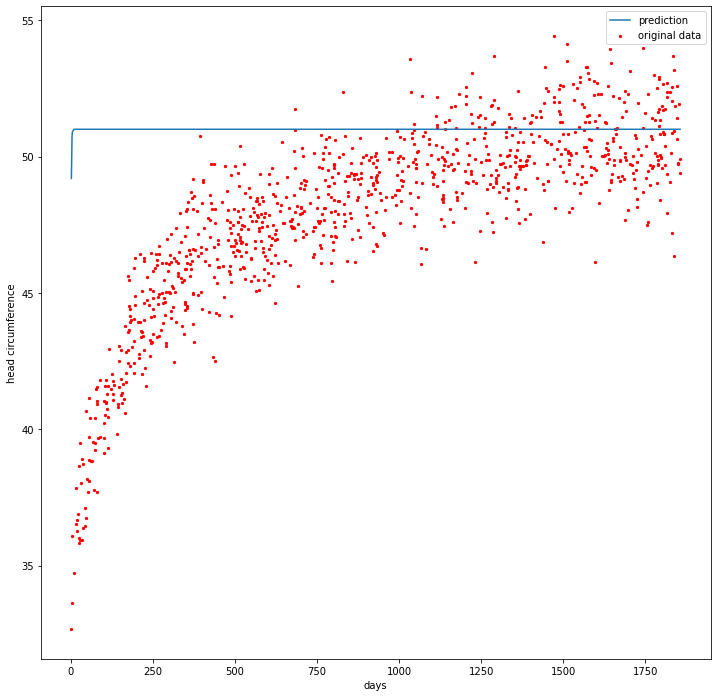

In [15]:
predicted_tensor = (20 * sigmoid(x_train.mm(w1).add(b1)) + 31).flatten().detach().numpy()
plt.figure(figsize=(12, 12))

plt.scatter(training_data_x_unsorted, training_data_y_unsorted, c='red', s=5, label='original data')
plt.plot(x_train, predicted_tensor, label='prediction')
plt.xlabel('days')
plt.ylabel('head circumference')
plt.legend()

plt.show()
